### **Representación de grafos en python**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
nx.ham

In [ ]:
G = nx.Graph()
# Añadimos nodos
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])
# Agregamos las aristas
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'), ('A', 'C'), ('B', 'E')])

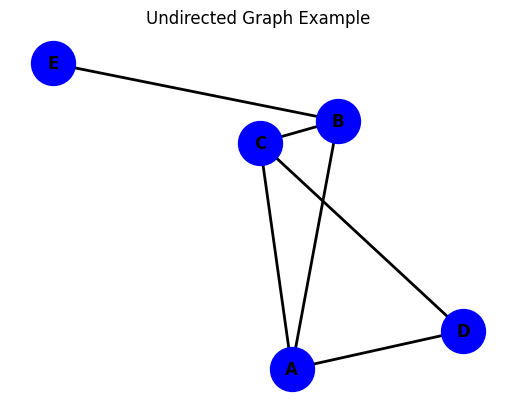

In [ ]:
# nx.spring_layout is a common algorithm for visually appealing layouts
pos = nx.random_layout(G)

# 5. Draw the graph
# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=1000)
# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='black', width=2)
# Draw labels (node names)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# 6. Customize the plot (optional)
plt.title("Undirected Graph Example")
plt.axis('off') # Turn off the axis for a cleaner look

# 7. Display the plot
plt.show()

#### Para grafos dirigidos:

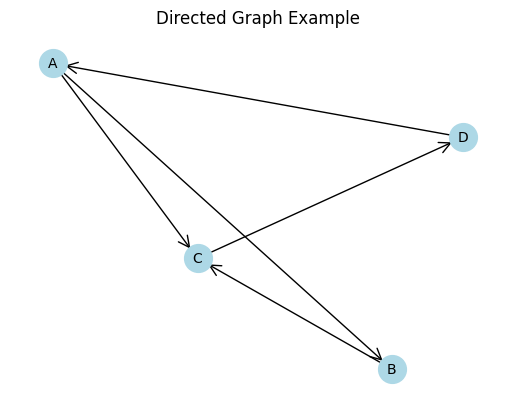

In [ ]:
G = nx.DiGraph()

# Add nodes to the graph
G.add_nodes_from(['A', 'B', 'C', 'D'])

# Add directed edges to the graph
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'D')
G.add_edge('D', 'A') # This creates a cycle
G.add_edge('A', 'C') # Another edge

# Define the layout of the nodes
# Spring layout is a common choice for visualizing network structures
pos = nx.random_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=400)

# Draw the edges with arrows to indicate direction
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True, arrowstyle='->', arrowsize=20)

# Draw the labels of the nodes
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Display the plot
plt.title("Directed Graph Example")
plt.axis('off') # Turn off the axis
plt.show()

Aplicamos esto a un genoma:

In [ ]:
archivo =

In [ ]:
with open(archivo) as f:
  chain = f.read().upper()

Definimos previamente dos funciones. Una para obtener los distintos k-meros en una secuencia y su respectivo conteo, y otra que genera las aristas.

In [ ]:
def get_kmer_count_from_sequence(sequence, k=3, cyclic=True):
    """
    Returns dictionary with keys representing all possible kmers in a sequence
    and values counting their occurrence in the sequence.
    """
    # dict to store kmers
    kmers = {}

    # count how many times each occurred in this sequence (treated as cyclic)
    for i in range(0, len(sequence) - k):
        kmer = sequence[i:i + k]

        # for cyclic sequence get kmers that wrap from end to beginning
        length = len(kmer)
        if cyclic:
            if len(kmer) != k:
                kmer += sequence[:(k - length)]

        # if not cyclic then skip kmers at end of sequence
        else:
            if len(kmer) != k:
                continue

        # count occurrence of this kmer in sequence
        if kmer in kmers:
            kmers[kmer] += 1
        else:
            kmers[kmer] = 1

    return kmers


In [ ]:
def get_edges_from_kmers(kmers):
    """
    Every possible (k-1)mer (n-1 suffix and prefix of kmers) is assigned
    to a node, and we connect one node to another if the (k-1)mer overlaps
    another. Nodes are (k-1)mers, edges are kmers.
    """
    # store edges as tuples in a set
    edges = set()

    # compare each (k-1)mer
    for k1 in kmers:
        for k2 in kmers:
            if k1 != k2:
                # if they overlap then add to edges
                if k1[1:] == k2[:-1]:
                    edges.add((k1, k2))
                if k1[:-1] == k2[1:]:
                    edges.add((k2, k1))

    return edges

In [ ]:
nodes_count = get_kmer_count_from_sequence(sequence = INSERTAR CADENA AQUI O SUBCONJUNTO DE LA CADENA, k = 5, cyclic = True)
nodes = list(nodes_count.keys())

In [ ]:
edges = list(get_edges_from_kmers(nodes))

In [ ]:
G = nx.DiGraph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.spring_layout(G)

# Draw the nodes
plt.figure(figsize=(50,50))
nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=30)

# Draw the edges with arrows to indicate direction
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True, arrowstyle='->', arrowsize=5)

# Draw the labels of the nodes
nx.draw_networkx_labels(G, pos, font_size=5, font_color='black')
# larger figure size
plt.show()